In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [3]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, and_


In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)


In [7]:
# View all of the classes that automap found
Base.classes.keys()


['station', 'measurement']

In [8]:
# Save references to each tables
station =  Base.classes.station
measurement = Base.classes.measurement


In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
recent = session.query(func.max(measurement.date)).scalar()
print(recent)


2017-08-23


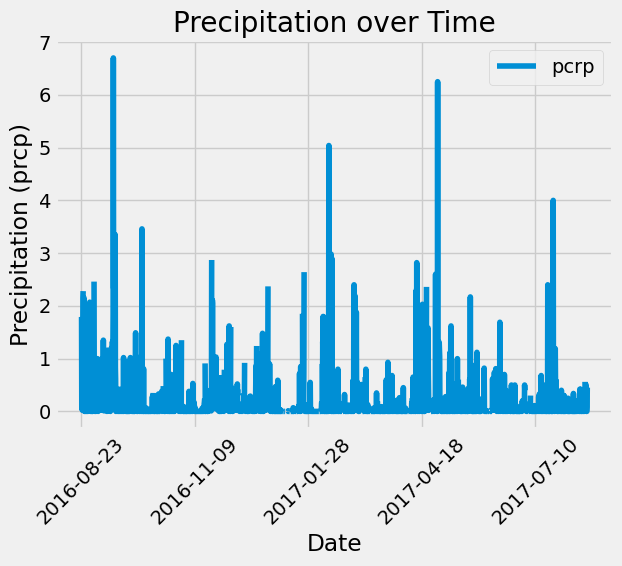

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
year_before = dt.date(2017, 8, 23) - dt.timedelta(days=365)
query = session.query(measurement.date, measurement.prcp).filter(
    and_(measurement.date >= year_before, measurement.date <= recent)
)
r = query.all()
# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(r, columns=['date', 'pcrp']) 
# Sort the dataframe by date
df.sort_values(by='date', inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x='date', y='pcrp', title='Precipitation over Time')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Precipitation (prcp)')
plt.show()


In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe


<bound method NDFrame.describe of             date  pcrp
0     2016-08-23  0.00
1009  2016-08-23   NaN
1529  2016-08-23  1.79
704   2016-08-23  0.05
361   2016-08-23  0.15
...          ...   ...
1527  2017-08-22  0.00
1008  2017-08-23  0.00
360   2017-08-23  0.00
1528  2017-08-23  0.08
2229  2017-08-23  0.45

[2230 rows x 2 columns]>

# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
session.query()
session.query(func.count(station.station)).all()


[(9,)]

In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
q = session.query(measurement.station, func.count(measurement.station).label('count')) \
    .group_by(measurement.station) \
    .order_by(func.count(measurement.station).desc())
r = q.all()
for each, count in r:
    print(f"station: {each}, count: {count}")


station: USC00519281, count: 2772
station: USC00519397, count: 2724
station: USC00513117, count: 2709
station: USC00519523, count: 2669
station: USC00516128, count: 2612
station: USC00514830, count: 2202
station: USC00511918, count: 1979
station: USC00517948, count: 1372
station: USC00518838, count: 511


In [26]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
a_station =  q.first()[0]
t_query = session.query(
    func.min(measurement.tobs),
    func.max(measurement.tobs),
    func.avg(measurement.tobs)
).filter(measurement.station == a_station)
stats = t_query.one()
stats


(54.0, 85.0, 71.66378066378067)

In [38]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
e_date = dt.date.today()
s_date = e_date - dt.timedelta(days=365)
q_t = session.query(measurement.tobs).\
filter(measurement.station == a_station).\
filter(measurement.date <= s_date)
data = q_t.all()
df_t = pd.DataFrame(data, columns=['TOBS'])
df_t.head()


,TOBS
0,70.0
1,62.0
2,74.0
3,75.0
4,74.0


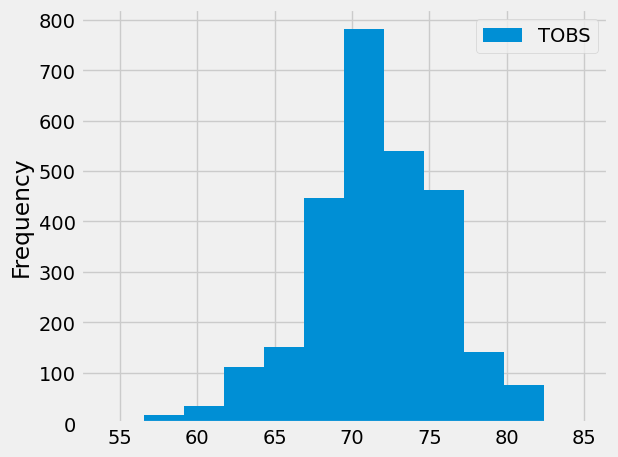

In [40]:
df_t.plot.hist(bins=12)
plt.tight_layout()


# Close Session

In [41]:
# Close Session
session.close()
